In [1]:
import spacy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacytextblob.spacytextblob import SpacyTextBlob

In [2]:
# Function to perform setiment analysis by using TextBlob
def analyze_sentiment(text):
    polarity = nlp(text)._.blob.polarity  # Sentiment score between -1 and 1

# Text required to be slight stronger tendency to classify as positve or negative
    if polarity > 0.2:
        return "Positive"
    elif polarity < -0.2:
        return "Negative"
    else:
        return "Neutral"
        
# Function to presprocessing text
def preprocess_text(text):
    doc = nlp(text.lower().strip().strip('"'))  # Convert to lowercase and remove whitespace
    tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]  # Remove stopwords & non-alphabetic words
    return " ".join(tokens)

In [3]:
# Setting up spaCy with textblob library
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")
df = pd.read_csv('amazon_product_reviews.csv')

print(df.isnull().sum())

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews.date               0
reviews.dateSeen           0
reviews.didPurchase    28323
reviews.doRecommend    12246
reviews.id             28291
reviews.numHelpful     12217
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title              0
reviews.username           5
sourceURLs                 0
dtype: int64


In [4]:
# Removing unused column
df.drop(['dateAdded',
         'dateUpdated',
         'asins',
         'categories',
         'imageURLs',
         'keys',
         'reviews.didPurchase',
         'reviews.dateSeen',
         'reviews.id',
         'reviews.sourceURLs',
         'reviews.username',
         'reviews.doRecommend',
         'reviews.numHelpful',
         'sourceURLs'
        ],axis=1, inplace=True)


In [5]:
df.head()

,id,name,brand,primaryCategories,manufacturer,manufacturerNumber,reviews.date,reviews.rating,reviews.text,reviews.title
0,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,AVpgNzjwLJeJML43Kpxn,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [6]:
print("Distribution of reviews rating")
print(df.loc[:,['id','reviews.rating']].groupby('reviews.rating').count())

Distribution of reviews rating
                   id
reviews.rating       
1                 965
2                 616
3                1206
4                5648
5               19897


In [7]:
# Removing any data with empty "reviews" and extrating review data
df.dropna(subset=['reviews.text'])

# Cleansing reviews.text column
df['reviews.text.cleaned'] = df["reviews.text"].apply(preprocess_text)

# Applying sentiment analysis and stored in sentiment column
df['sentiment'] = df['reviews.text.cleaned'].apply(analyze_sentiment)

In [8]:
# Printing first 5 comment text, review score and sentiment score to verify the model
for i in range(0,5):
    print('Review text: ', df["reviews.text"][i])
    print('Review Score: ', df['reviews.rating'][i])
    print('Sentiment Score: ', df['sentiment'][i])

Review text:  I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
Review Score:  3
Sentiment Score:  Negative
Review text:  Bulk is always the less expensive way to go for products like these
Review Score:  4
Sentiment Score:  Negative
Review text:  Well they are not Duracell but for the price i am happy.
Review Score:  5
Sentiment Score:  Positive
Review text:  Seem to work as well as name brand batteries at a much better price
Review Score:  5
Sentiment Score:  Positive
Review text:  These batteries are very long lasting the price is great.
Review Score:  5
Sentiment Score:  Positive


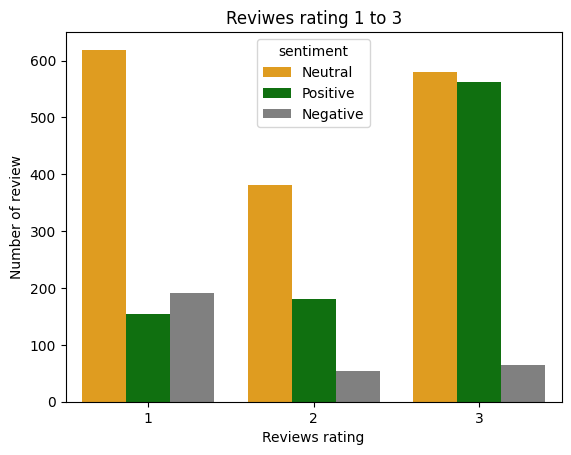

In [9]:
# Showing relation between reviews and sentiment. Saving plot into files
custom_palette = {
    'Negative': 'grey',
    'Neutral': 'orange',
    'Positive': 'green'
}
hue_order = ['Negative', 'Neutral', 'Positive']
sns.countplot(df[df['reviews.rating'] < 4], x='reviews.rating', hue='sentiment', palette=custom_palette)
plt.xlabel("Reviews rating")
plt.ylabel("Number of review")
plt.title('Reviwes rating 1 to 3')
plt.savefig('rating_plot_1to3.png')
plt.show()

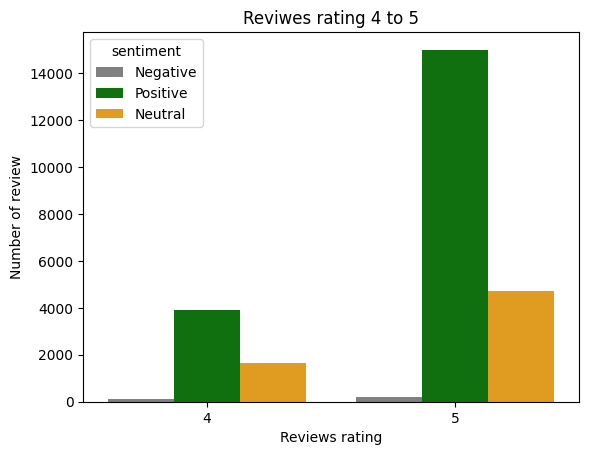

In [10]:
# Showing relation between reviews and sentiment. Saving plot into files
plt.title('Reviwes rating 4 to 5')
sns.countplot(df[df['reviews.rating'] >= 4], x='reviews.rating', hue='sentiment', palette=custom_palette)
plt.xlabel("Reviews rating")
plt.ylabel("Number of review")
plt.savefig('rating_plot_4to5.png')
plt.show()

In [11]:
# Getting result for some outlier
outlier = df.loc[(df['reviews.rating'] == 5) & (df['sentiment'] == 'Negative')]
outlier_text= outlier['reviews.text'].values
print('Printing unexpected review (rated 5 but sentiment is Negative):')
for i in range(0,5):
    print(outlier_text[i])



Printing unexpected review (rated 5 but sentiment is Negative):
Batteries were inexpensive, work well in multiple devices.I hate running out of triple A batteries!
They are batteries... They do last a while though in the R/C toys we got for x-mas. I would buy these again over more expensive name brands.
They're batteries. They make small devices work. What more is there to say
You know, I really like the Amazon line of batteries. At first I has hesitant on using anything other than Duracell, I tried these and especially for the price you simply cannot go wrong....
I have purchased Amazon batteries before and they last as long as the leading brands like Energizer or Duracell's for 3x less the cost. Most people nowadays are using rechargeable but there are a few things that still require Alkaline such as my temp signal transmitter for my digital clocks and a pair of these lasted about 9 months out in weather. Other brands died within a few months. You will not be disappointed.


In [17]:
#Testing sentiment analysis score with following sentence
print('Buying this product never cannot go wrong')
print('Sentiment Score : ',nlp("Buying this product never cannot go wrong")._.blob.polarity)

Buying this product never cannot go wrong
Score :  -0.5


In [23]:
# Testing similarity
reviews_text_cleaned = df['reviews.text.cleaned'].values
print("Testing for similarity")
for i in range(0,5):
    saved = nlp(reviews_text_cleaned[i])
    for k in range(0,5):
        sim = saved.similarity(nlp(reviews_text_cleaned[k]))
        print(sim)


Testing for similarity
1.0
0.49599385261535645
0.58771812915802
0.6433884501457214
0.5522983074188232
0.49599385261535645
1.0
0.5177678465843201
0.4006657004356384
0.5421891808509827
0.58771812915802
0.5177678465843201
1.0
0.5245806574821472
0.5761757493019104
0.6433884501457214
0.4006657004356384
0.5245806574821472
1.0
0.450712651014328
0.5522983074188232
0.5421891808509827
0.5761757493019104
0.450712651014328
1.0


C:\Users\tcmok\AppData\Local\Temp\ipykernel_4580\2984330711.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim = saved.similarity(nlp(reviews_text_cleaned[k]))
